# Part 1: Initial Setup and Data Loading

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Load the dataset
# Make sure the path "uncleaned_dataset.csv" is correct for your file location.
try:
    df = pd.read_csv("Dataset/uncleaned_dataset.csv")
except FileNotFoundError:
    print("Error: 'uncleaned_dataset.csv' not found. Please check the file path.")
    # Exit or handle the error as needed, for now we'll create an empty df
    df = pd.DataFrame()

# Create a copy to work on, preserving the original
df_cleaned = df.copy()

# Part 2: Comprehensive Data Cleaning

# Step 1: Standardize Column Names and Remove Duplicates

In [62]:
# Step 1: Standardize Column Names and Remove Duplicates

df_cleaned.columns = df_cleaned.columns.str.strip()
if df_cleaned.duplicated().any():
    print(f"Found and removed {df_cleaned.duplicated().sum()} duplicate rows.")
    df_cleaned.drop_duplicates(inplace=True)

# Step 2: Clean 'ID' Column

In [63]:
df_cleaned['ID'] = pd.to_numeric(df_cleaned['ID'], errors='coerce')
df_cleaned['ID'] = df_cleaned['ID'].interpolate().astype(int)

# Step 3: Clean 'Name' Column

In [64]:
df_cleaned['Name'] = df_cleaned['Name'].str.strip()
df_cleaned['Name'] = df_cleaned['Name'].fillna('unknown')

# Step 4: Clean 'Age' Column

In [65]:
df_cleaned['Age'] = df_cleaned['Age'].replace('twenty', '20')
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
mean_age = df_cleaned['Age'].mean()
df_cleaned['Age'] = df_cleaned['Age'].fillna(mean_age)
df_cleaned['Age'] = df_cleaned['Age'].astype(int)

# Step 5: Clean 'City' Column

In [66]:
df_cleaned['City'] = df_cleaned['City'].str.strip().replace('', np.nan)
city_mode = df_cleaned['City'].mode()[0]
df_cleaned['City'] = df_cleaned['City'].fillna(city_mode)

# Step 6: Clean 'Product' Column

In [67]:
product_mode = df_cleaned['Product'].mode()[0]
df_cleaned['Product'] = df_cleaned['Product'].fillna(product_mode)

# Step 7: Clean 'Price' Column

In [68]:
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
median_price = df_cleaned['Price'].median()
df_cleaned['Price'] = df_cleaned['Price'].fillna(median_price)

# Step 8: Clean 'Quantity' Column

In [69]:
df_cleaned['Quantity'] = pd.to_numeric(df_cleaned['Quantity'], errors='coerce')
df_cleaned['Quantity'] = df_cleaned['Quantity'].abs() # Convert negatives to positive
median_quantity = df_cleaned['Quantity'].median()
df_cleaned['Quantity'] = df_cleaned['Quantity'].fillna(median_quantity)
df_cleaned['Quantity'] = df_cleaned['Quantity'].astype(int)

# Step 9: Clean 'Purchase Date' Column

In [70]:
df_cleaned['Purchase Date'] = pd.to_datetime(df_cleaned['Purchase Date'], errors='coerce')
df_cleaned['Purchase Date'] = df_cleaned['Purchase Date'].ffill() # Forward-fill missing dates

# Step 10: Clean 'Email' and 'Feedback' Columns

In [71]:
df_cleaned['Email'] = df_cleaned['Email'].fillna('not_provided')
df_cleaned['Feedback'] = df_cleaned['Feedback'].str.strip().replace('N/A', np.nan)
df_cleaned['Feedback'] = df_cleaned['Feedback'].fillna('No Feedback')

# Part 3: Final Verification of Cleaned Data

In [72]:
# Check for any remaining missing values
print("\nMissing Values Check:")
print(df_cleaned.isnull().sum())


Missing Values Check:
ID               0
Name             0
Age              0
City             0
Product          0
Price            0
Quantity         0
Purchase Date    0
Email            0
Feedback         0
dtype: int64


In [73]:
# Check final data types and non-null counts
print("\nData Info and Types Check:")
df_cleaned.info()


Data Info and Types Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1000 non-null   int64         
 1   Name           1000 non-null   object        
 2   Age            1000 non-null   int64         
 3   City           1000 non-null   object        
 4   Product        1000 non-null   object        
 5   Price          1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Purchase Date  1000 non-null   datetime64[ns]
 8   Email          1000 non-null   object        
 9   Feedback       1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 78.3+ KB


In [74]:
print("\nFirst 5 rows of the cleaned dataset:")
print(df_cleaned.head())


First 5 rows of the cleaned dataset:
   ID    Name  Age      City Product   Price  Quantity Purchase Date  \
0   1     Bob   19  New York   Shoes  135.41         2    2021-09-16   
1   2    Judy   20   Chicago   Shirt  306.92         4    2021-03-17   
2   3   Frank   47     Miami   Shirt  465.80         4    2022-09-28   
3   4  Hannah   20  New York   Shoes  250.79         1    2022-09-28   
4   5    Judy   40   Chicago   Pants   49.18         5    2020-05-18   

               Email     Feedback  
0  user0@example.com  No Feedback  
1  user1@example.com      Average  
2  user2@example.com         Good  
3  user3@example.com      Average  
4  user4@example.com         Good  


# Part 4: Exploratory Data Analysis (EDA)

In [76]:
print("\n--- Starting Exploratory Data Analysis ---")

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# 1. Summary Statistics
print("\nNumerical Data Summary:")
print(df_cleaned.describe())

print("\nCategorical Data Summary:")
print(df_cleaned.describe(include=['object']))


--- Starting Exploratory Data Analysis ---

Numerical Data Summary:
                ID          Age        Price     Quantity  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    32.129000   250.492400     2.736000   
min       1.000000    18.000000    10.090000     1.000000   
25%     250.750000    20.000000   131.212500     1.000000   
50%     500.500000    32.000000   250.860000     3.000000   
75%     750.250000    32.000000   362.875000     4.000000   
max    1000.000000    70.000000   499.230000     5.000000   
std     288.819436    13.486669   137.511721     1.371928   

                    Purchase Date  
count                        1000  
mean   2022-02-06 10:20:38.400000  
min           2020-01-02 00:00:00  
25%           2021-01-24 12:00:00  
50%           2022-02-10 12:00:00  
75%           2023-02-27 06:00:00  
max           2024-02-09 00:00:00  
std                           NaN  

Categorical Data Summary:
         Name     City Product

# 2. Univariate Analysis (Analyzing Single Variables)

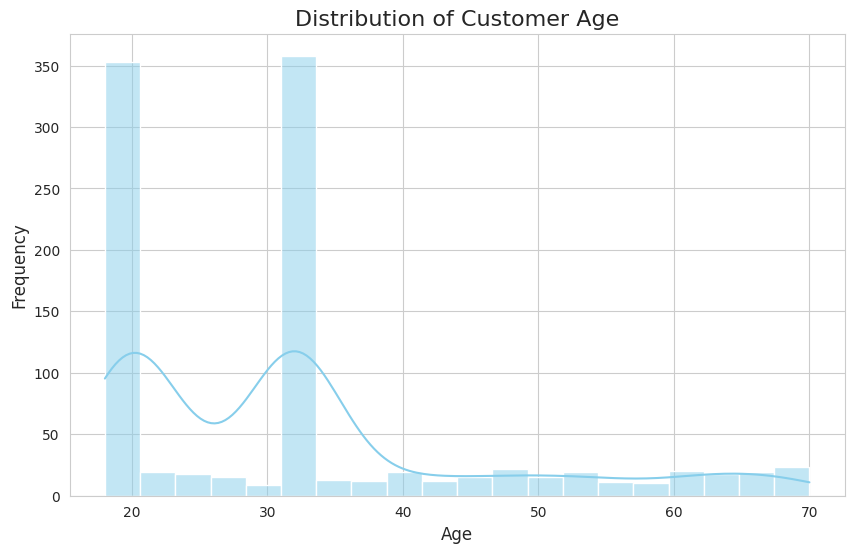

In [86]:
# Distribution of Customer Age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

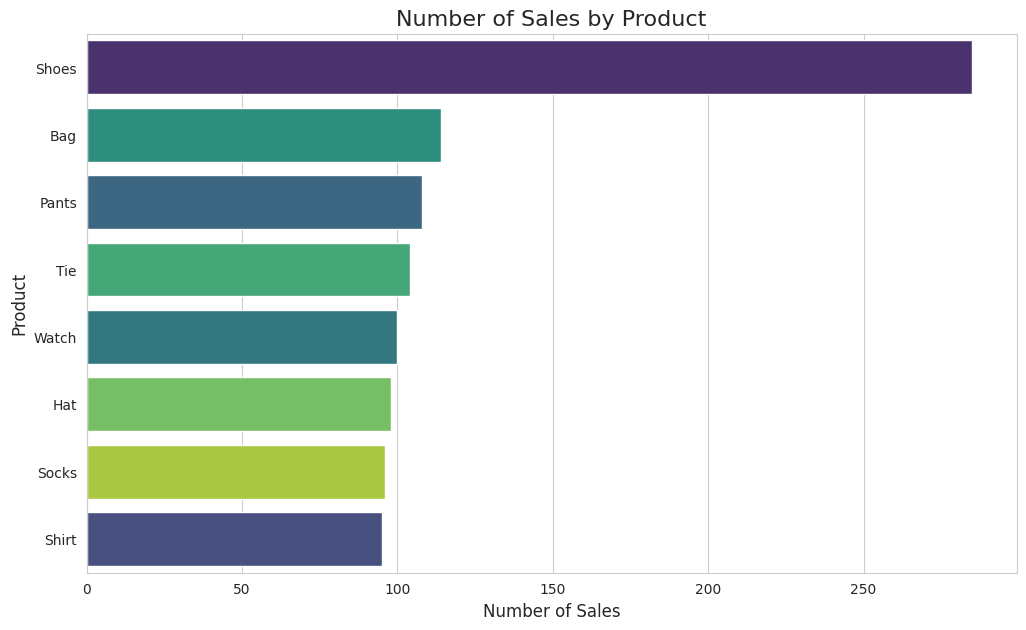

In [87]:
# Sales by Product
plt.figure(figsize=(12, 7))
# --- FIX APPLIED for FutureWarning ---
sns.countplot(y=df_cleaned['Product'], order=df_cleaned['Product'].value_counts().index, hue=df_cleaned['Product'], palette='viridis', legend=False)
plt.title('Number of Sales by Product', fontsize=16)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()

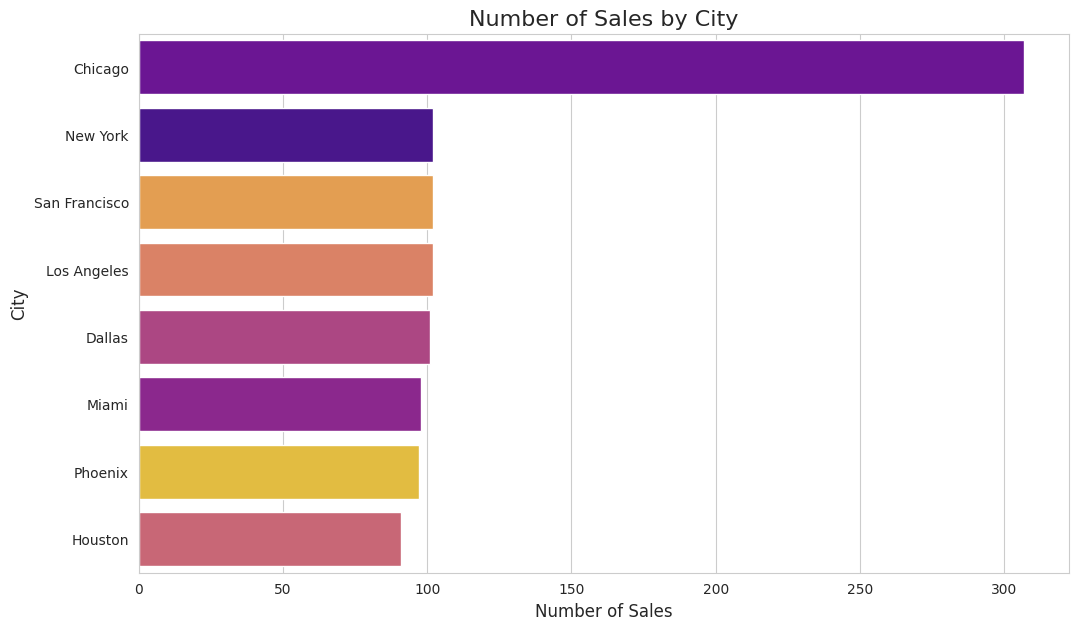

In [88]:
# Sales by City
plt.figure(figsize=(12, 7))
# --- FIX APPLIED for FutureWarning ---
sns.countplot(y=df_cleaned['City'], order=df_cleaned['City'].value_counts().index, hue=df_cleaned['City'], palette='plasma', legend=False)
plt.title('Number of Sales by City', fontsize=16)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

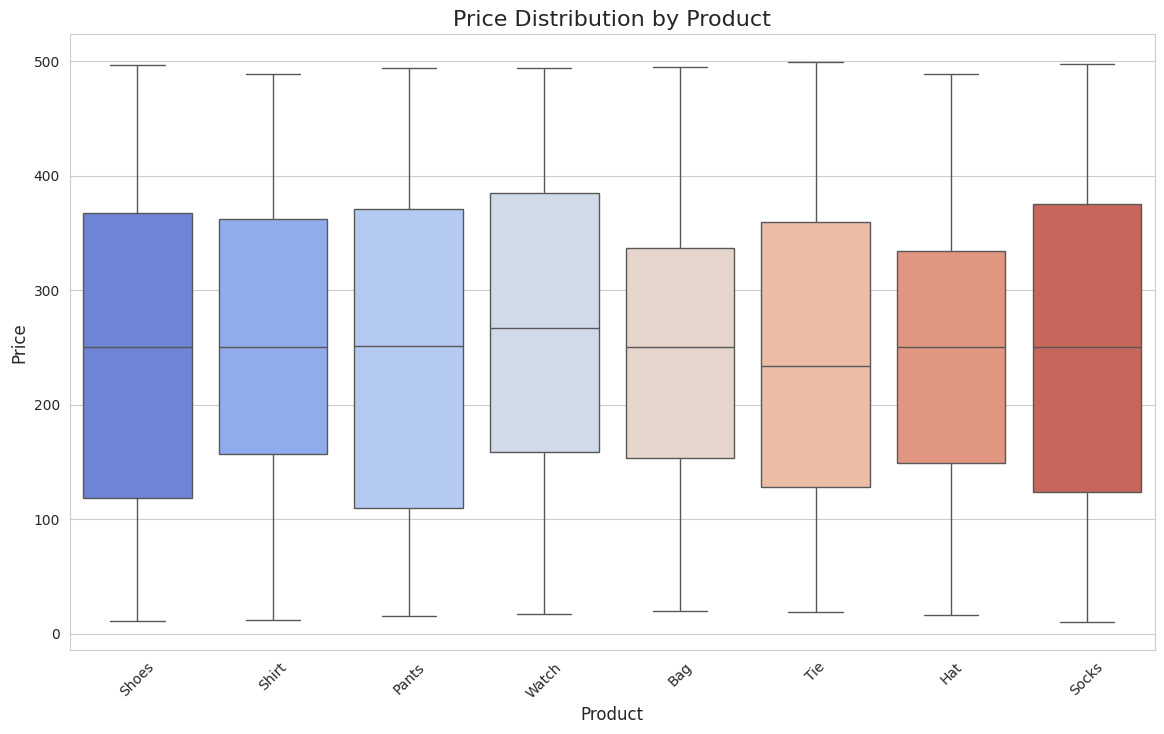

In [89]:
# 3. Bivariate Analysis (Analyzing Relationships)

# Price Distribution by Product
plt.figure(figsize=(14, 8))
# --- FIX APPLIED for FutureWarning ---
sns.boxplot(x='Product', y='Price', data=df_cleaned, hue='Product', palette='coolwarm', legend=False)
plt.title('Price Distribution by Product', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

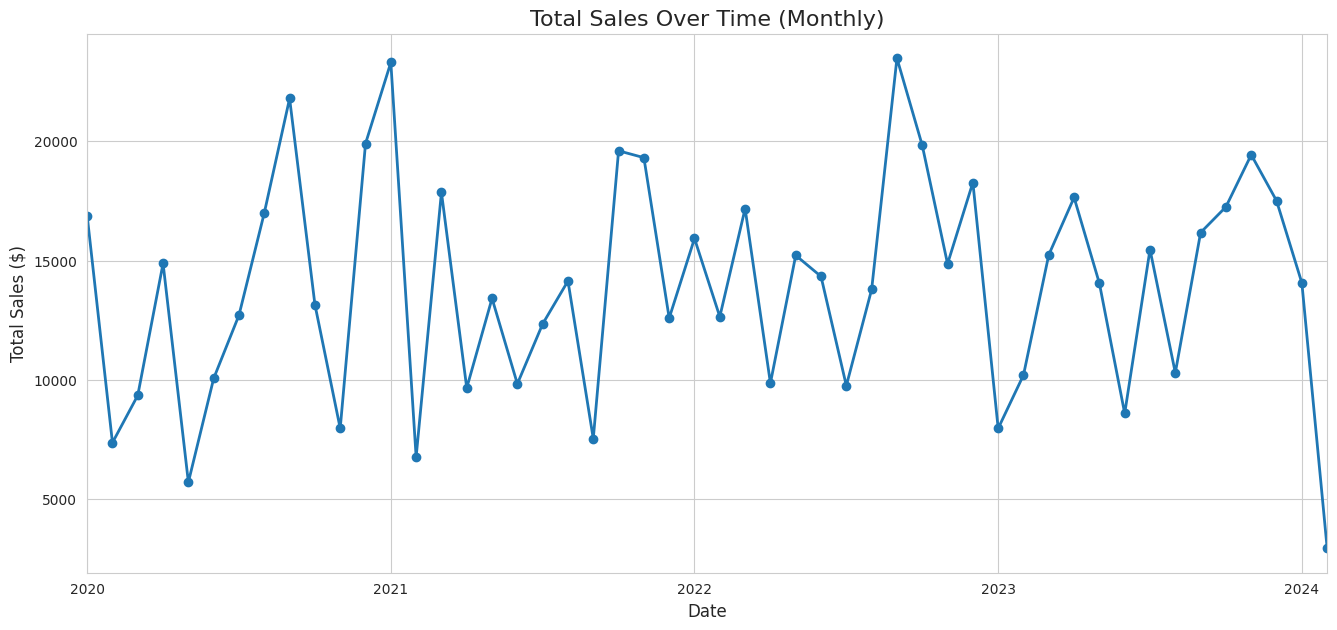

In [90]:
# Sales Over Time
# Create 'Total Sale' column for analysis
df_cleaned['Total Sale'] = df_cleaned['Price'] * df_cleaned['Quantity']
# --- FIX APPLIED for FutureWarning ---
monthly_sales = df_cleaned.set_index('Purchase Date').resample('ME')['Total Sale'].sum()

plt.figure(figsize=(16, 7))
monthly_sales.plot(linewidth=2, marker='o')
plt.title('Total Sales Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.show()


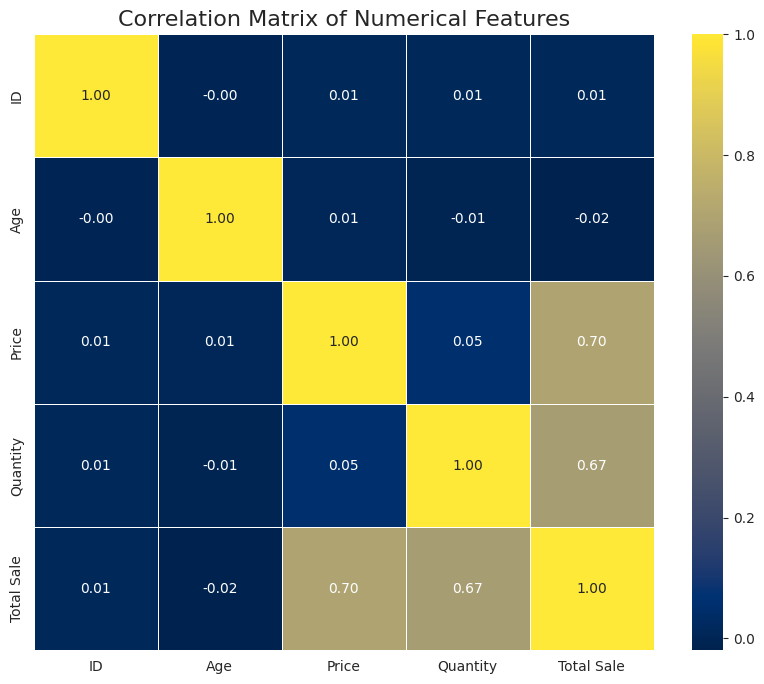


--- EDA Complete ---


In [91]:
# 4. Correlation Analysis
# Select only numeric columns for the correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

print("\n--- EDA Complete ---")